<h1> Create Signal and BG PDF for profile likelihood </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from LZlim_pyNEST import *
from ROOT import TH2D
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<h1> WS cuts </h1>

In [2]:
#WS cuts
S1_min=0
S1_max=20
S2raw_min=250
NS1_coin_req=3

<h1> ATM nu PDF </h1>

total between 1.00 and 100.00 keV = 1.09144e-07 [evts/kg/day]
LZ exposure factor = 1.6361e+06


//global/project/projectdirs/lux/data/aLib/pyNEST.py:384: RuntimeWarning: invalid value encountered in true_divide
  R[TIB>0]       = 1. - np.log(1. + (Ni[TIB>0]/4.) * TIB[TIB>0]) / ((Ni[TIB>0]/4.)*TIB[TIB>0])
//global/project/projectdirs/lux/data/aLib/pyNEST.py:385: RuntimeWarning: invalid value encountered in greater
  R[R>1.]        = 1.
//global/project/projectdirs/lux/data/aLib/pyNEST.py:386: RuntimeWarning: invalid value encountered in less
  R[R<0.]        = 0.
//global/project/projectdirs/lux/data/aLib/pyNEST.py:111: RuntimeWarning: invalid value encountered in less
  poisMeanIn[poisMeanIn<1e-6] = 1e-6


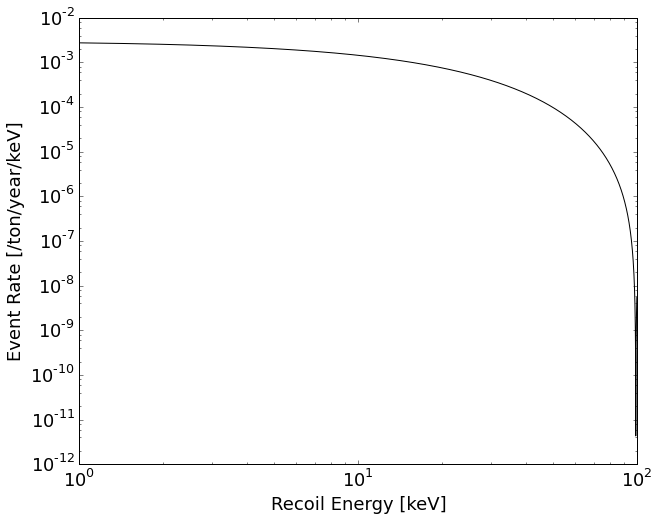

In [3]:
# ATM nu PDF

file_path='data/atm_Peter_update.txt' #caught a 2x error in rate
ParticleType='NR'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hatm=TH2D("hatm","atm pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) # make a histogram with 100 bins 0 to 100 in S1,and 100 bins 0 to 1e5 in S2
for index, S1_val in enumerate(S1_cut):
    hatm.Fill(S1_cut[index],S2_cut[index])
hatm.Scale(Rate_evts_kg_day/nSim)
hatm.SaveAs("root_pdfs/atm_pdf.root") #write out to file

In [4]:
hatm.Integral()

5.636318950142175e-08

<h1> B8 </h1>

total between 1.00 and 4.40 keV = 0.000260662 [evts/kg/day]
LZ exposure factor = 685.069


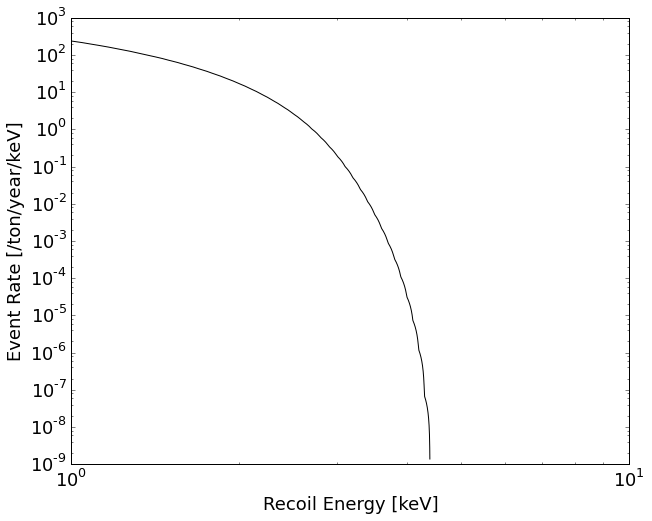

In [5]:
# 8B nu PDF

file_path='data/B8_Peter.txt'
ParticleType='NR'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hB8=TH2D("hB8","B8 pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hB8.Fill(S1_cut[index],S2_cut[index])
hB8.Scale(Rate_evts_kg_day/nSim)
hB8.SaveAs("root_pdfs/B8_pdf.root") #write out to file

<h1> HEP </h1>

total between 0.10 and 5.80 keV = 6.32879e-06 [evts/kg/day]
LZ exposure factor = 28215.7


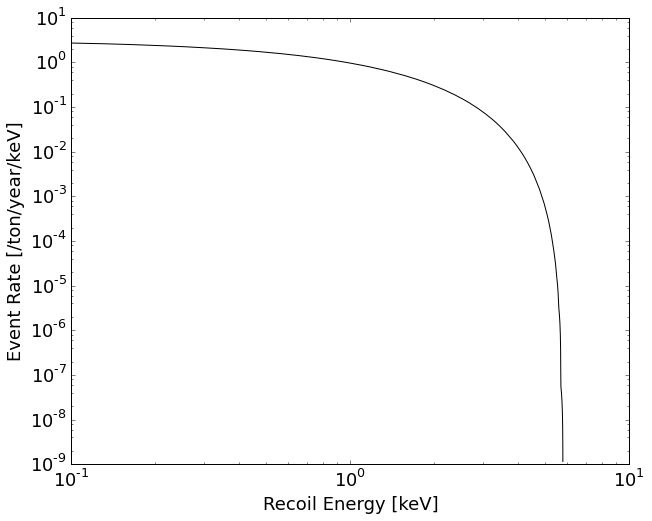

In [6]:
# 8B nu PDF

file_path='data/hep_Peter.txt' 
ParticleType='NR'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hhep=TH2D("hhep","hep pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hhep.Fill(S1_cut[index],S2_cut[index])
hhep.Scale(Rate_evts_kg_day/nSim)
hhep.SaveAs("root_pdfs/hep_pdf.root") #write out to file

<h1> DSN </h1>

total between 0.10 and 118.35 keV = 1.21975e-07 [evts/kg/day]
LZ exposure factor = 1.464e+06


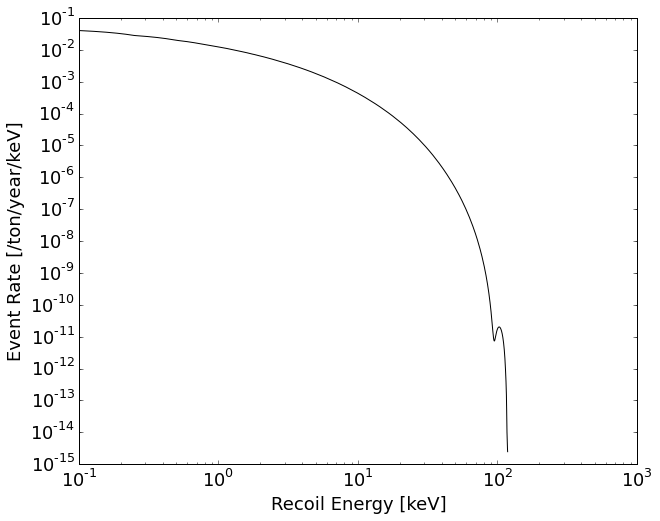

In [ ]:
file_path='data/DSN_DiffRate.txt' 
ParticleType='NR'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hDSN=TH2D("hDSN","DNS pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hDSN.Fill(S1_cut[index],S2_cut[index])
hDSN.Scale(Rate_evts_kg_day/nSim)
hDSN.SaveAs("root_pdfs/DSN_pdf.root") #write out to file

<h1> PP + 7Be + 13N</h1>

In [ ]:
file_path='data/PPsolarNu_Peter.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hPP=TH2D("hPP","PP pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hPP.Fill(S1_cut[index],S2_cut[index])
hPP.Scale(Rate_evts_kg_day/nSim*250/271) #patch to match Peter's calculation
hPP.SaveAs("root_pdfs/PP_pdf.root") #write out to file

<h1>2nvBB 136Xe </h1>

In [ ]:
file_path='data/twovBB_evt_ton_year_keV_lin.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

h2vBB=TH2D("h2vBB","2vBB pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    h2vBB.Fill(S1_cut[index],S2_cut[index])
h2vBB.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
h2vBB.SaveAs("root_pdfs/2vBB_pdf.root") #write out to file

<h1> 85Kr </h1>

In [ ]:
file_path='data/Kr85_beta_spectrum_LZ_fid.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hKr=TH2D("hKr","Kr pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hKr.Fill(S1_cut[index],S2_cut[index])
hKr.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
hKr.SaveAs("root_pdfs/Kr_pdf.root") #write out to file

<h1> Rn222 </h1>

In [ ]:
#### Rn222 ... approximate 0.3 evt/keV/Ton/year at 0.1 uBq/kg, LZ has about 0.07 uBq/kg ########
Rn222_rate=0.7*0.35*100/365 #evt/Ton/year/keV...*100keV/365days to E_max with 0.7 uBq/kg
nSim=ceil(Rn222_rate*1000*5.6)#in 1000 days *5.6 Tons #doesn't scale with 5.6 tons, assume Bq to kg conversion
#Eee, kr85=np.loadtxt('Kr85_beta_spectrum_LZ_fid.txt',skiprows=0,unpack=True) #evts/keV/day with no discrim
Eee=np.linspace(0.1,100,2e3) # to 100 keV
Rn222 = 0.7*0.35*ones(size(Eee)) #evts/keV/ton/year... for 0.7 uBq/kg
#Energy scale must be linear in text file for code to work properly!
dR = Rn222 #evts/keV/ton/yea

np.savetxt('data/Rn222_LZ_fid.txt' ,np.vstack([Eee, dR]).T)

file_path='data/Rn222_LZ_fid.txt'
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hRn=TH2D("hRn","Rn pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hRn.Fill(S1_cut[index],S2_cut[index])
hRn.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
hRn.SaveAs("root_pdfs/Rn_pdf.root") #write out to file

<h1> Detector ER fiducial BG from Paolo </h1>

In [ ]:
file_path='data/rate_er_fidvol.txt' 
ParticleType='ER'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hDetE=TH2D("hDetE","Det ER pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hDetE.Fill(S1_cut[index],S2_cut[index])
hDetE.Scale(Rate_evts_kg_day/nSim) 
hDetE.SaveAs("root_pdfs/Detfid_ER_pdf.root") #write out to file

<h1> Detector NR fiducial from Paolo </h1>

In [ ]:
file_path='data/rate_nr_fidvol.txt' 
ParticleType='NR'
nSim=1e6

Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, Rate_evts_kg_day, LZ_exposure_factor = dN2NphNe(file_path=file_path,ParticleType=ParticleType,nSim=nSim)

WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)

S1_cut=S1[WS_cut]
S2_cut=S2[WS_cut]

hDetN=TH2D("hDetN","Det NR pdf;S1;S2",100,S1_min,S1_max,100,0,2e4) 
for index, S1_val in enumerate(S1_cut):
    hDetN.Fill(S1_cut[index],S2_cut[index])
hDetN.Scale(Rate_evts_kg_day/nSim) 
hDetN.SaveAs("root_pdfs/Detfid_NR_pdf.root") #write out to file

<h1> Save and plot BG PDFs </h1>

In [ ]:
# draw and make a pdf of pdf :p

c=rootnotes.default_canvas()
hatm.Draw("colz") # check it looks right
c.SaveAs('root_pdfs/atm_pdf.pdf')

c1=rootnotes.default_canvas()
hB8.Draw("colz") # check it looks right
c1.SaveAs('root_pdfs/b8_pdf.pdf')

c2=rootnotes.default_canvas()
hhep.Draw("colz") # check it looks right
c2.SaveAs('root_pdfs/hep_pdf.pdf')

c3=rootnotes.default_canvas()
hDSN.Draw("colz") # check it looks right
c3.SaveAs('root_pdfs/dsn_pdf.pdf')

c4=rootnotes.default_canvas()
hPP.Draw("colz") # check it looks right
c4.SaveAs('root_pdfs/pp_pdf.pdf')

c5=rootnotes.default_canvas()
h2vBB.Draw("colz") # check it looks right
c5.SaveAs('root_pdfs/2vBB_pdf.pdf')

c6=rootnotes.default_canvas()
hKr.Draw("colz") # check it looks right
c6.SaveAs('root_pdfs/Kr_pdf.pdf')

c7=rootnotes.default_canvas()
hRn.Draw("colz") # check it looks right
c7.SaveAs('root_pdfs/Rn_pdf.pdf')

c8=rootnotes.default_canvas()
hDetE.Draw("colz") # check it looks right
c8.SaveAs('root_pdfs/DetFid_E_pdf.pdf')

c9=rootnotes.default_canvas()
hDetN.Draw("colz") # check it looks right
c9.SaveAs('root_pdfs/DetFid_N_pdf.pdf')

#create a root file with the four nu background PDFs

Fout=TFile('root_pdfs/All_BG.root','recreate')
Fout.Add(hB8)
Fout.Add(hhep)
Fout.Add(hDSN)
Fout.Add(hatm)
Fout.Add(hPP)
Fout.Add(h2vBB)
Fout.Add(hKr)
Fout.Add(hRn)
Fout.Add(hDetE)
Fout.Add(hDetN)
Fout.Write()

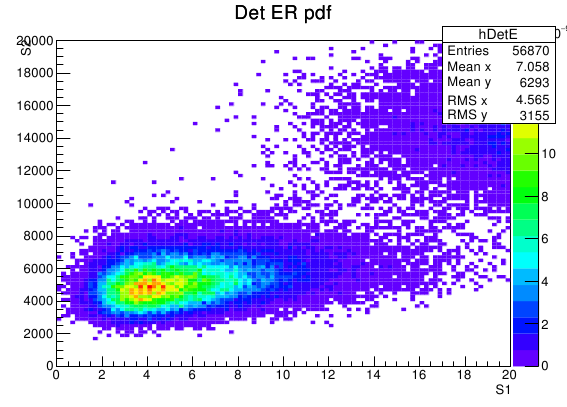

In [18]:
c5=rootnotes.default_canvas()
hDetE.Draw("colz") # check it looks right
#c5.SaveAs('root_pdfs/2vBB_pdf.pdf')
c5

<h1> Generate WIMP signal PDFs </h1>

total rate above 0.00 keV = 554435 [evts/kg/day per pb]
LZ exposure factor per pb = 3.22078e-07
total rate above 0.00 keV = 658201 [evts/kg/day per pb]
LZ exposure factor per pb = 2.71302e-07
total rate above 0.00 keV = 791070 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 2.25734e-07
total rate above 0.00 keV = 926348 [evts/kg/day per pb]
LZ exposure factor per pb = 1.92769e-07
total rate above 0.00 keV = 1.0363e+06 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 1.72316e-07
total rate above 0.00 keV = 1.1063e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 1.61414e-07
total rate above 0.00 keV = 1.10278e+06 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 1.61929e-07
total rate above 0.00 keV = 1.01276e+06 [evts/kg/day per pb]
LZ exposure factor per pb = 1.76322e-07
total rate above 0.00 keV = 872773 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 2.04602e-07
total rate above 0.00 keV = 711024 [evts/kg/day per pb]
LZ exposure factor per pb = 2.51147e-07
total rate above 0.00 keV = 562255 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 3.17599e-07
total rate above 0.00 keV = 431524 [evts/kg/day per pb]
LZ exposure factor per pb = 4.13816e-07
total rate above 0.00 keV = 327043 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 5.46019e-07
total rate above 0.00 keV = 245659 [evts/kg/day per pb]
LZ exposure factor per pb = 7.26909e-07
total rate above 0.00 keV = 183396 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 9.73691e-07
total rate above 0.00 keV = 136296 [evts/kg/day per pb]
LZ exposure factor per pb = 1.31017e-06
total rate above 0.00 keV = 100950 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 1.76891e-06
total rate above 0.00 keV = 74678 [evts/kg/day per pb]
LZ exposure factor per pb = 2.39122e-06
total rate above 0.00 keV = 55185.1 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



LZ exposure factor per pb = 3.23586e-06
total rate above 0.00 keV = 40738.5 [evts/kg/day per pb]
LZ exposure factor per pb = 4.38336e-06


TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).


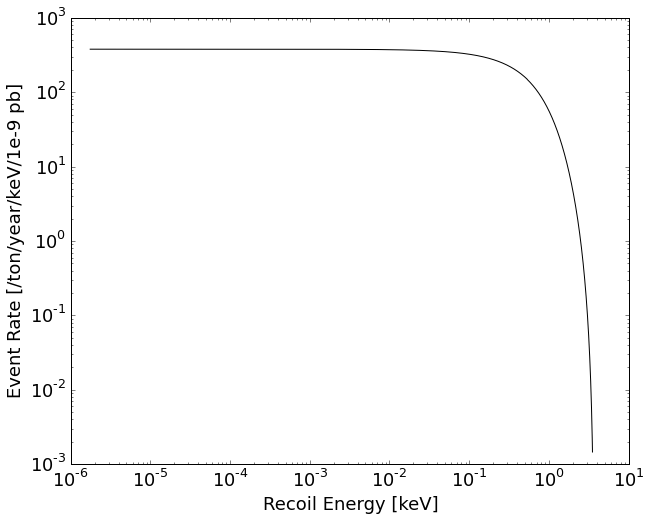

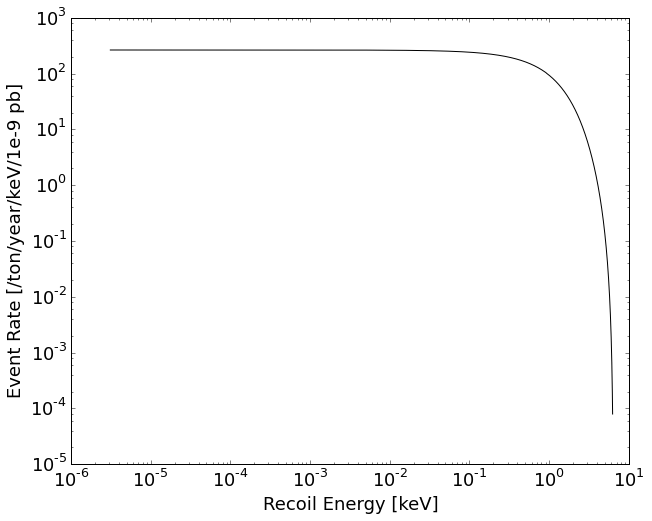

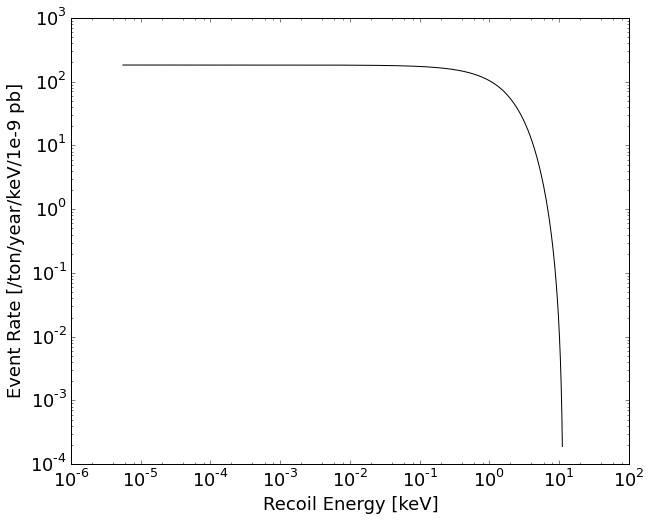

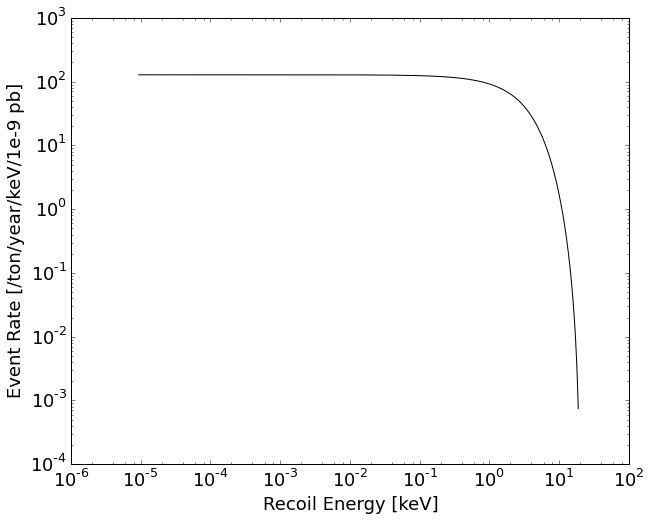

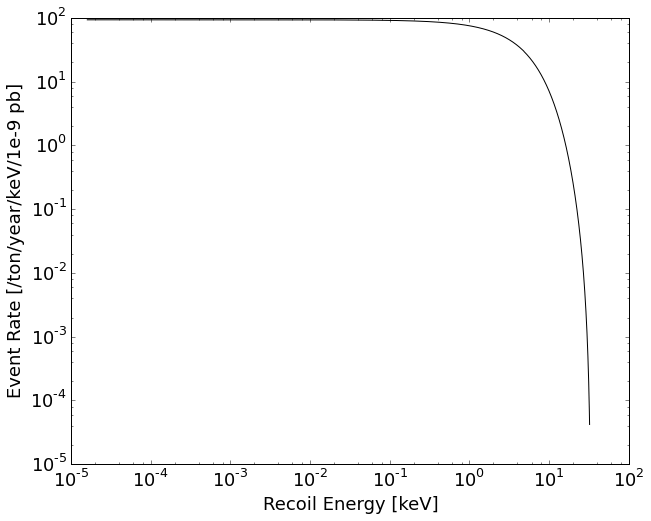

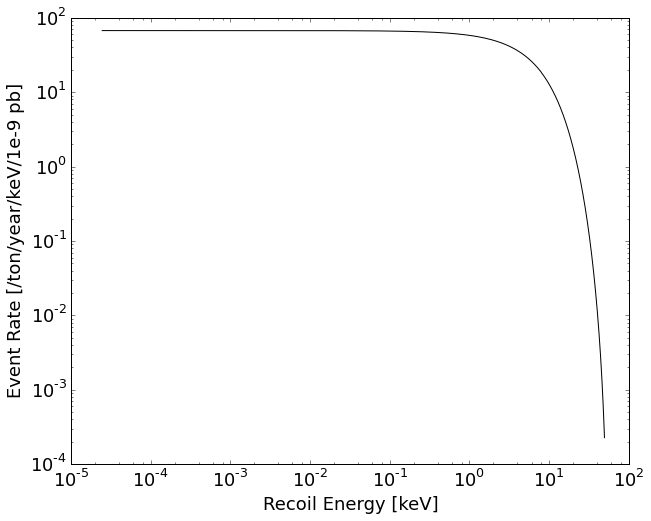

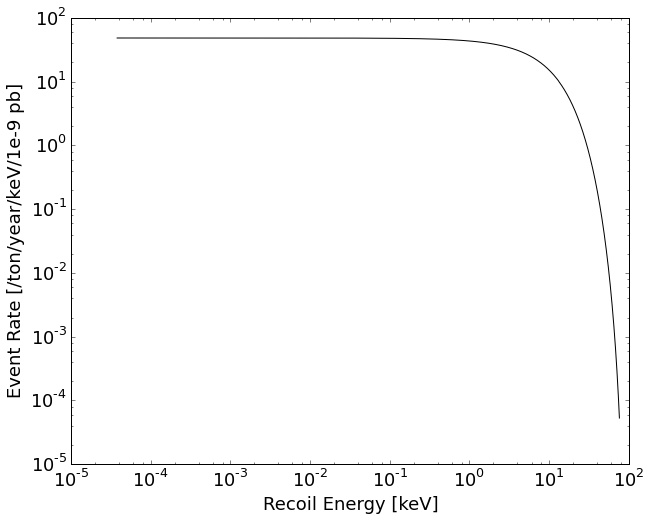

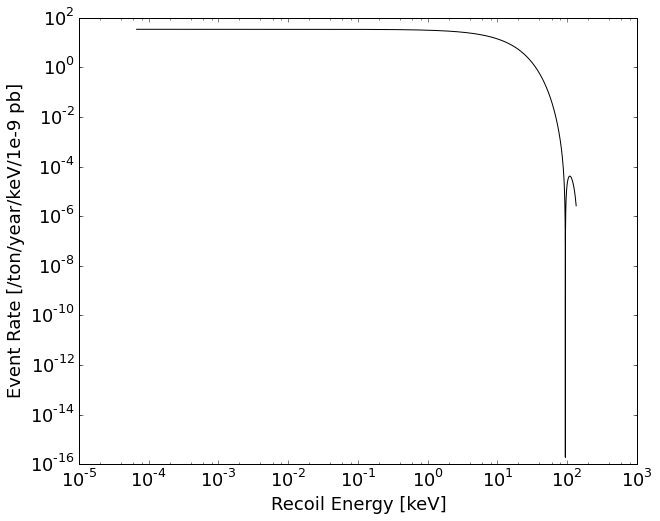

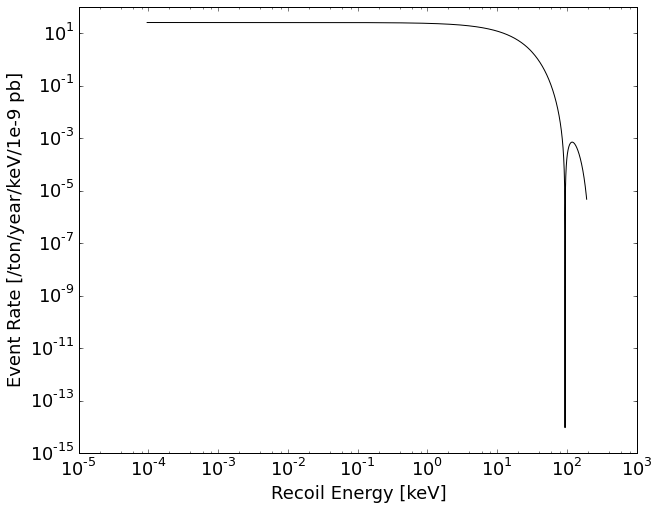

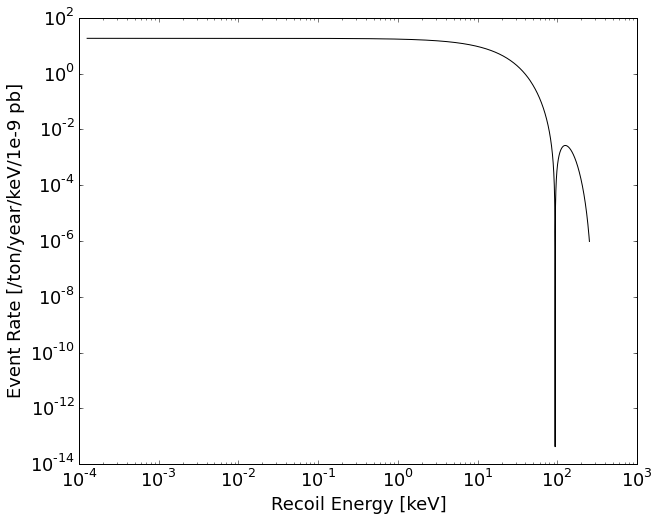

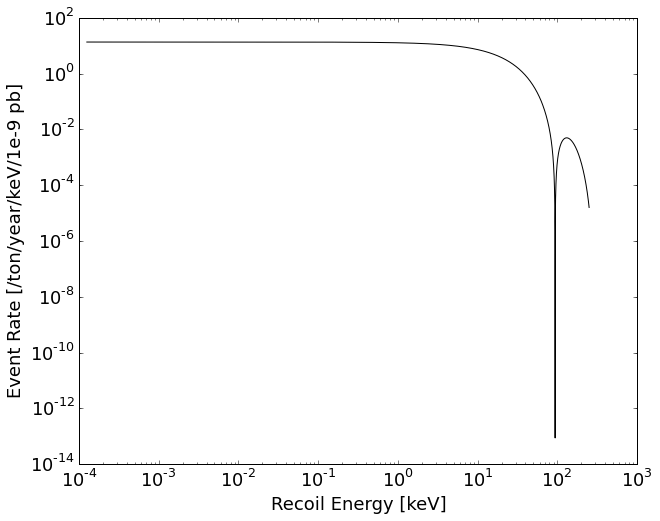

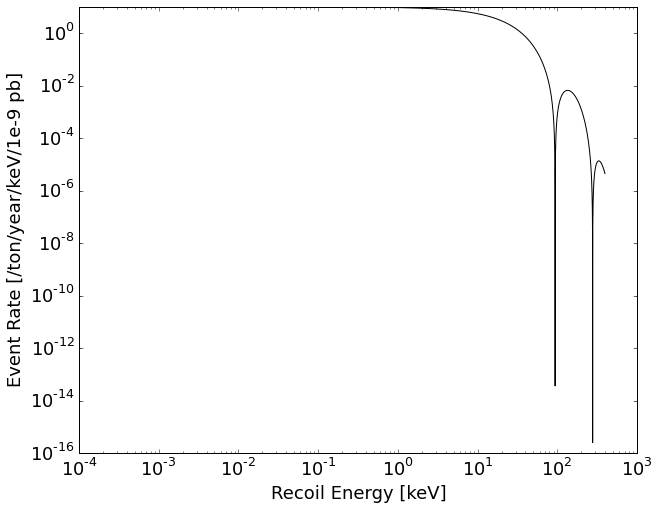

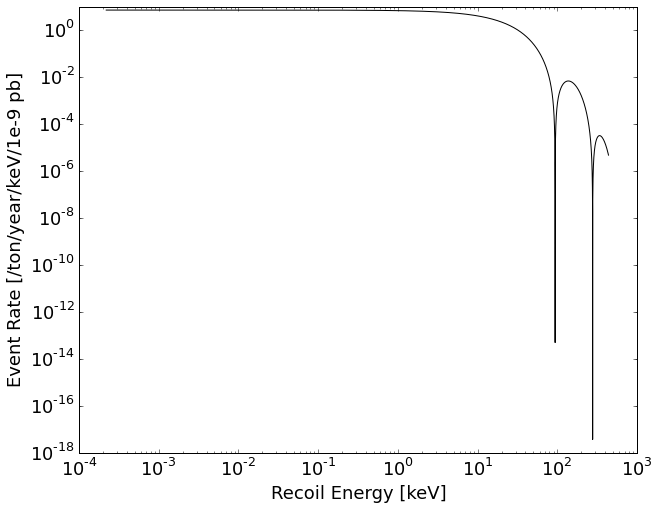

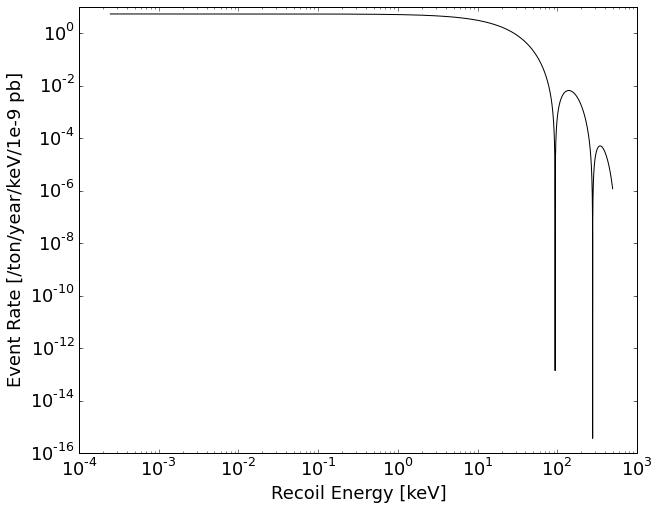

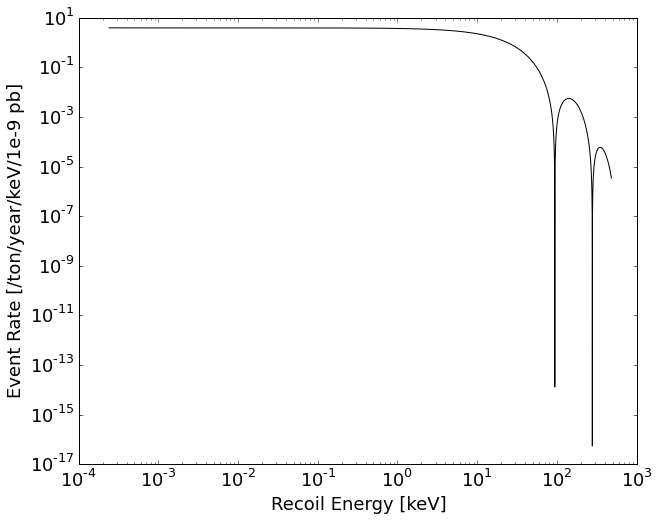

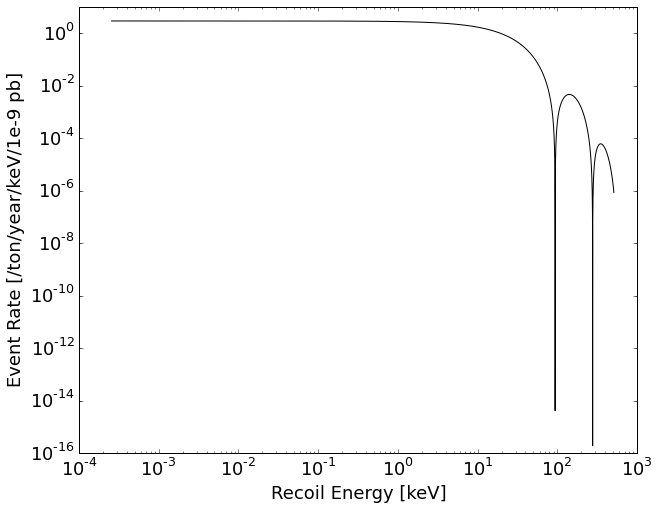

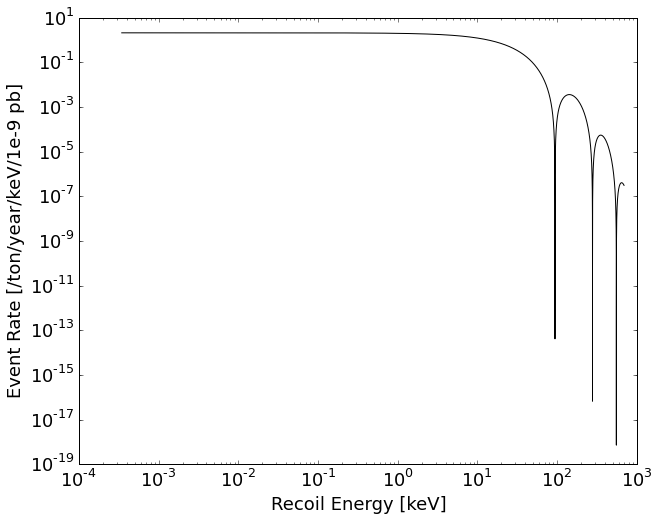

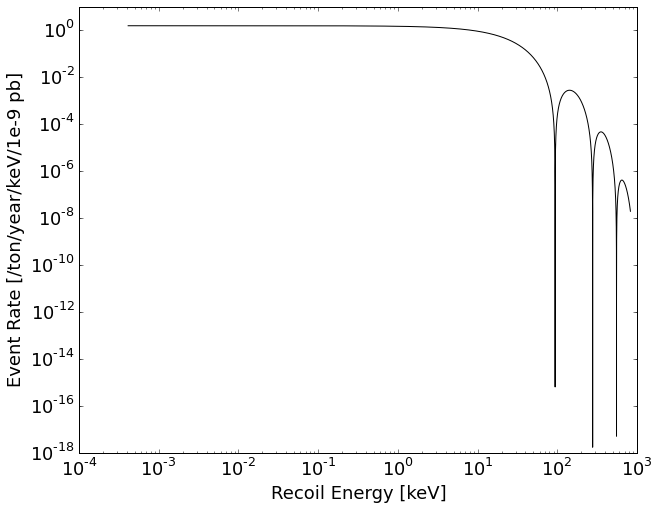

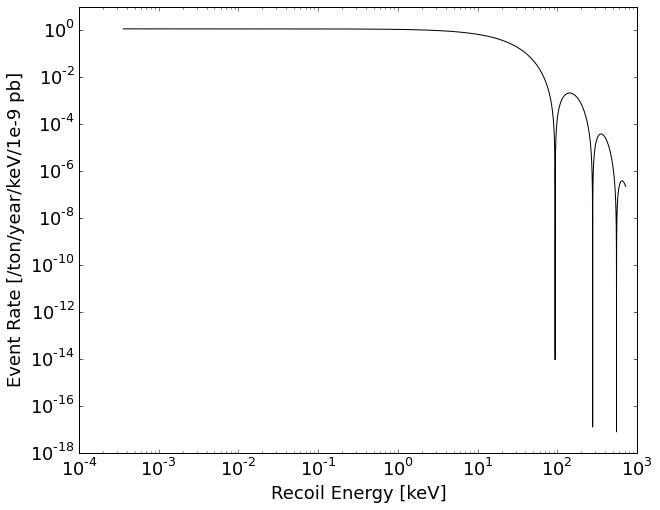

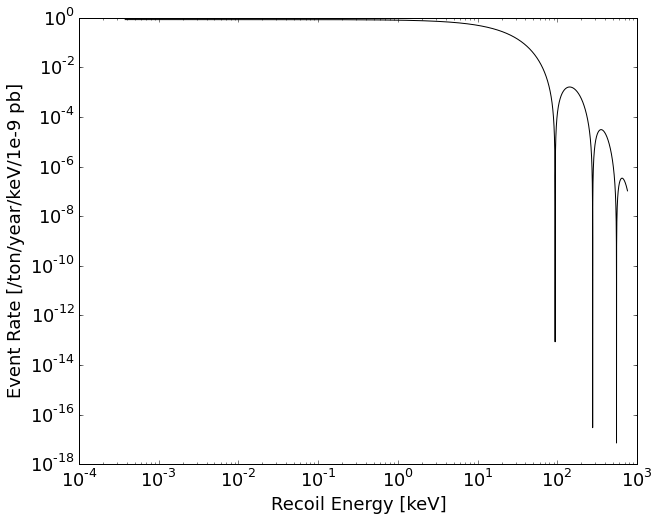

In [14]:
nSim=1e6

#Generate WIMPs
for mWmp in int32(logspace(log10(6),log10(2000),20)):
    Nph, Ne, Ne_ext, S1_spike, S1, S2, S2_raw, NS1_coin, WmpRate, LZ_exposure_factor=WIMP2NphNe(mWmp=mWmp,nSim=nSim)
    # 1e-45 cm^2 cross section
    WS_cut=(inrange(S1,[S1_min,S1_max])) & (S2_raw>=S2raw_min) & (NS1_coin>=NS1_coin_req)
    S1_cut=S1[WS_cut]
    S2_cut=S2[WS_cut]

    hWmp=TH2D("wimpEventDensity","WIMP pdf;S1;S2",100,S1_min,S1_max,100,0,2e4)
    for index, S1_val in enumerate(S1_cut):
        hWmp.Fill(S1_cut[index],S2_cut[index])
    hWmp.Scale(WmpRate/nSim)
    #hWmp.Integral()
    hWmp.SaveAs("root_pdfs/mass_{:}_pdf.root".format(mWmp)) #write out to file
    
    c=rootnotes.default_canvas()
    hWmp.Draw("colz") # check it looks right
    c.SaveAs("root_pdfs/mass_{:}_pdf.pdf".format(mWmp)) #write out to file


In [ ]:
c4=rootnotes.default_canvas()
hWmp.Draw("colz") # check it looks right
c4

In [13]:
for index, ii in enumerate(int32(logspace(log10(6),log10(2000),20))):
    print(ii)

6
8
11
15
20
27
37
51
69
94
127
173
235
319
433
588
799
1085
1473
2000


In [21]:
int32(logspace(log10(6),log10(2000),20))

array([   6,    8,   11,   15,   20,   27,   37,   51,   69,   94,  127,
        173,  235,  319,  433,  588,  799, 1085, 1473, 2000], dtype=int32)